# use class to encapsulate scraping functions

2021/01/03

In [55]:
# run python scripts containing all the functions
%run -i '0_paths_open_save.py'
%run -i '1_scraping_cleaning_merge.py'
%run -i '2_summary_stats_visualization_new.py'

## 1. Scraping

In [2]:
initial_panels = ['201812', '201907', '201908', '201912', '202001', '202002']
current_panel = '202102'

for i in initial_panels:
    o = open_files(initial_panel=i)
    DF = o.open_df_to_id_for_scraping()
    id_list = get_id_from_data_before_202009(DF)
    print(i)
    print('The number of IDs are:', len(id_list))
    print('start scraping apps with initial panel', i)
    app_details = scraping_apps_according_to_id(id_list)
    print('Finished scraping app details with initial panel', i)
    s = save_files(initial_panel=i, current_panel=current_panel, app_details_dict=app_details)
    s.save_scraped_app_details()
    print('Saved scarped app details with initial panel', i)

scraping...: 100%|██████████| 8042/8042 [57:29<00:00,  2.33it/s]   


201812
The number of IDs are: 5977
start scraping apps with initial panel 201812
Finished scraping app details with initial panel 201812
Saved scarped app details with initial panel 201812
201907
The number of IDs are: 13144
start scraping apps with initial panel 201907
Finished scraping app details with initial panel 201907
Saved scarped app details with initial panel 201907
201908
The number of IDs are: 13015
start scraping apps with initial panel 201908
Finished scraping app details with initial panel 201908
Saved scarped app details with initial panel 201908
201912
The number of IDs are: 8468
start scraping apps with initial panel 201912
Finished scraping app details with initial panel 201912
Saved scarped app details with initial panel 201912
202001
The number of IDs are: 8359
start scraping apps with initial panel 202001
Finished scraping app details with initial panel 202001
Saved scarped app details with initial panel 202001
202002
The number of IDs are: 8042
start scraping app

## 2. Check the scraped data

In [2]:
current_panel = '201912'
tracking_panels = ['201812', '201907', '201908']

o = open_files(current_panel=current_panel, tracking_panels=tracking_panels)
app_details = o.open_app_detail_dict()
A = app_detail_dicts(app_details)
A.get_a_glimpse()

PANEL 201812
a random app id is: com.webruli.edmdjgame
title  :  Dj EDM Pads Game
icon  :  https://lh3.googleusercontent.com/DnDVnhzJcI0RfbtkBRVpcv6CXpqGbKP42IDgIgrac2VlOfQCBNu4J6wKLqSA3gfFBBs
screenshots  :  ['https://lh3.googleusercontent.com/wXvJVZPUjvCZ0NDqcfMwSbfTyl-CAVyokoZD8l5wij8PdQ8RRHiUuLca3KaPSMKK60w=w720-h310-rw', 'https://lh3.googleusercontent.com/EKEWxST_AgGberll4oxbCMeOFktM2-gjX37ZeRUeG7lDcwq71BEbm0gXfiCfLHVjFxA=w720-h310-rw', 'https://lh3.googleusercontent.com/VWBgjGMlcrJCywZhIXpCrmsS5GDiyx2yMRHETA8iQywIEyXE_x7zoLNjLIlt6QBBLuxD=w720-h310-rw', 'https://lh3.googleusercontent.com/I_bcuhPTp6cOEt1Oz23Rd6jSMVIrucMG3C8aoUURPiP5TL0dnjwXgmClTBB-2dCAXFQ=w720-h310-rw', 'https://lh3.googleusercontent.com/rNJSYE5IWmlK8Y8idAunJuqr0f1xYNgkLQdtXy9Ll_AOcPFOOTMYkRXrf_D8-dvKesQ=w720-h310-rw', 'https://lh3.googleusercontent.com/L6T_z74HEeZg0pl51ZpzBOftFuUDCDmIYEIvdfVhDv8lsG8_LbWDfBn16Jenuf04wg=w720-h310-rw']
video  :  None
category  :  ['GAME_MUSIC', 'FAMILY_MUSICVIDEO']
score  :  2.7
hist

## 3. Convert

In [61]:
# test
%run -i '1_scraping_cleaning_merge.py'
initial_panel='201907'
all_panels=['201907', '201908', '201909', '201912', '202001', '202003', '202004',
          '202009', '202010', '202011', '202012', '202101', '202102']
o = open_files(initial_panel=initial_panel,
                   all_panels=all_panels)
app_details = o.open_initial_panel_with_its_tracking_panels()
A = app_detail_dicts(d=app_details, all_panels=all_panels)
inter_df = A.format_cols()
print(inter_df['201907'].columns)

Index(['title', 'description', 'summary', 'minInstalls', 'score', 'ratings',
       'reviews', 'histogram', 'price', 'currency', 'size', 'developer',
       'released', 'updated', 'comments', 'developerId', 'developerWebsite',
       'developerEmail', 'developerAddress', 'appId', 'adSupported_True',
       'containsAds_True', 'free_True', 'offersIAP_True',
       'contentRating_Adult', 'contentRating_Everyone', 'contentRating_Teen',
       'genreId_Entertainment', 'genreId_Game', 'genreId_Productivity'],
      dtype='object')


In [62]:
%run -i '1_scraping_cleaning_merge.py'
# key represents initial panel, value represents panels (including the initial) tracking the initial panel
panels_track = {
'201812':['201812', '201912', '202001', '202003', '202004', '202009', '202010',
          '202011', '202012', '202101', '202102'],
'201907':['201907', '201908', '201909', '201912', '202001', '202003', '202004',
          '202009', '202010', '202011', '202012', '202101', '202102'],
'201908':['201908', '201912', '202001', '202003', '202004', '202009', '202010',
          '202011', '202012', '202101', '202102'],
'201912':['201912', '202001', '202003', '202004', '202009', '202010', '202011',
          '202012', '202101', '202102'],
'202001':['202001', '202003', '202004', '202009', '202010', '202011', '202012',
          '202101', '202102'],
'202002':['202002', '202004', '202009', '202010', '202011', '202012', '202101',
          '202102']}

for initial_panel, all_panels in panels_track.items():
    o = open_files(initial_panel=initial_panel,
                   all_panels=all_panels)
    app_details = o.open_initial_panel_with_its_tracking_panels()
    A = app_detail_dicts(d=app_details, all_panels=all_panels)
    merged_df = A.merge_panels_into_single_df()
    save = save_files(initial_panel=initial_panel, merged_df=merged_df)
    save.save_merged_df()
    print('panel data', initial_panel, 'has number of rows:')
    DF = summary_statistics(merged_df=merged_df)
    DF.print_num_rows()
    DF.print_col_names()

panel data 201812 has number of rows:
4278
title_201812
description_201812
summary_201812
minInstalls_201812
score_201812
ratings_201812
reviews_201812
histogram_201812
price_201812
currency_201812
size_201812
developer_201812
released_201812
updated_201812
comments_201812
developerId_201812
developerWebsite_201812
developerEmail_201812
developerAddress_201812
appId_201812
adSupported_True_201812
containsAds_True_201812
free_True_201812
offersIAP_True_201812
contentRating_Adult_201812
contentRating_Everyone_201812
contentRating_Teen_201812
genreId_Entertainment_201812
genreId_Game_201812
genreId_Productivity_201812
title_201912
description_201912
summary_201912
minInstalls_201912
score_201912
ratings_201912
reviews_201912
histogram_201912
price_201912
currency_201912
size_201912
developer_201912
released_201912
updated_201912
comments_201912
developerId_201912
developerWebsite_201912
developerEmail_201912
developerAddress_201912
appId_201912
adSupported_True_201912
containsAds_True_201

## 4. Impute Missing and Remove Outliers

In [71]:
# 4.1 drop columns with too many missings
%run -i '1_scraping_cleaning_merge.py'
%run -i '2_summary_stats_visualization_new.py'

o = open_files(initial_panel='201907')
merged_df = o.open_merged_df()
all_panels = ['201907', '201908', '201909', '201912',
                              '202001', '202003', '202004', '202009',
                              '202010', '202011', '202012', '202101', '202102']
DF1 = impute_missing(merged_df=merged_df,
                  all_panels=all_panels,
                     missing_ratio = 0.2)
# DF1.print_col_names()
l1, l2 = DF1.cols_missing_ratio()
DF2 = DF1.drop_cols(list_of_col_names=l2)

total number of columns contain missing value above 0.2 is 6
out of total number of columns 396
[('inAppProductPrice_202009', 0.4831694402420575), ('inAppProductPrice_202010', 0.48449319213313163), ('inAppProductPrice_202011', 0.4854387291981846), ('inAppProductPrice_202012', 0.48969364599092285), ('inAppProductPrice_202101', 0.4917738275340393), ('inAppProductPrice_202102', 0.4937594553706505)]


In [73]:
# 4.2 remove rows with at least 2 consecutive missing panels in minInstalls and impute minInstalls
%run -i '1_scraping_cleaning_merge.py'
%run -i '2_summary_stats_visualization_new.py'
new_class_df = impute_missing(merged_df=DF2,
                  all_panels=all_panels,
                     missing_ratio = 0.2)
A, l3 = new_class_df.check_apps_with_consecutive_missing_panels(var='minInstalls',
                                                         number_consec_panels_missing=2)
DF3 = new_class_df.drop_rows(list_of_row_labels=l3)
new_class_df = impute_missing(merged_df=DF3,
                  all_panels=all_panels,
                     missing_ratio = 0.2)
# new_class_df.print_col_names()
print(new_class_df.df.shape)
# imputing minInstalls
DF4 = new_class_df.impute_the_missing_panel_according_to_adjacent_panel(var='minInstalls')
DF5 = DF4[DF4.isnull().any(axis=1)]
print(DF5.shape)
DF6 = new_class_df.replace_cols(new_cols=DF4)

number of apps with at least 2 consecutive missing panels for minInstalls are 339
out of 10576 apps.
Before dropping we have 10576 rows
After dropping we have 10237 rows
(10237, 390)
(0, 13)
successfully replaced the old cols with replacement cols:
['minInstalls_201907', 'minInstalls_201908', 'minInstalls_201909', 'minInstalls_201912', 'minInstalls_202001', 'minInstalls_202003', 'minInstalls_202004', 'minInstalls_202009', 'minInstalls_202010', 'minInstalls_202011', 'minInstalls_202012', 'minInstalls_202101', 'minInstalls_202102']


cols with too many missing values that you must drop:
inAppProductPrice_202009-202102 (the only columns that have missing ratio above 0.3)

rows (appids) with too many consecutively missing panels in important variables (etc minInstalls)
should be dropped. I found appids with at least 2 consecutively missing minInstalls are just 270 out of
10576 total apps, so just drop them.

sequence first drop columns then drop rows.

title_201907
description_201907
summary_201907
score_201907
ratings_201907
reviews_201907
histogram_201907
price_201907
currency_201907
size_201907
developer_201907
released_201907
updated_201907
comments_201907
developerId_201907
developerWebsite_201907
developerEmail_201907
developerAddress_201907
appId_201907
adSupported_True_201907
containsAds_True_201907
free_True_201907
offersIAP_True_201907
contentRating_Adult_201907
contentRating_Everyone_201907
contentRating_Teen_201907
genreId_Entertainment_201907
genreId_Game_201907
genreId_Productivity_201907
title_201908
description_201908
summary_201908
score_201908
ratings_201908
reviews_201908
histogram_201908
price_201908
currency_201908
size_201908
developer_201908
released_201908
updated_201908
comments_201908
developerId_201908
developerWebsite_201908
developerEmail_201908
developerAddress_201908
appId_201908
adSupported_True_201908
containsAds_True_201908
free_True_201908
offersIAP_True_201908
contentRating_Adult_201908
contentRati

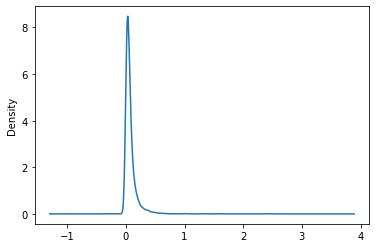

In [75]:
# 4.3 remove rows with at least 1 panel missing in score (then no need to impute)
#     and remove outliers in score using its standard deviation across panels
%run -i '2_summary_stats_visualization_new.py'
new_class_df = impute_missing(merged_df=DF6,
                              all_panels=all_panels,
                              missing_ratio = 0.2)
new_class_df.print_col_names()
sample_df = new_class_df.peek_at_sample_var_panels(var='score', sample=30)
sample_df_std = new_class_df.standard_deviation_of_var_panels(var='score')
appid_df, appid_l = new_class_df.check_apps_with_consecutive_missing_panels(var='score',
                                                    number_consec_panels_missing=1)
DF4 = new_class_df.drop_rows(list_of_row_labels=appid_l)
new_class_df = impute_missing(merged_df=DF4,
                              all_panels=all_panels,
                              missing_ratio = 0.2)
# delete score with standard deviation (of all panels) that are too large (outliers)
dfq, ax = new_class_df.peek_at_outliers(var='score', method='std',
                                      quantiles=[0.9,0.95,0.99,0.995], q_inter='midpoint')
s_o, index_o = new_class_df.define_outlier_appids(var='score', method='std',
                                                   cutoff_q=0.995, q_inter='midpoint')
DF7 = new_class_df.drop_rows(list_of_row_labels=index_o)

In [76]:
# 4.4 remove rows with at least 1 panel missing in reviews (then no need to impute)
#     and remove outliers in reviews (seems to be no obvious outliers)
%run -i '2_summary_stats_visualization_new.py'
new_class_df = impute_missing(merged_df=DF7,
                              all_panels=all_panels,
                              missing_ratio = 0.2)
# new_class_df.print_col_names()
sample_df = new_class_df.peek_at_sample_var_panels(var='review', sample=30)
appid_df, appid_l = new_class_df.check_apps_with_consecutive_missing_panels(var='review',
                                                    number_consec_panels_missing=1)
# 0 row has at least one panel missing in reviews, good, move on

number of apps with at least 1 consecutive missing panels for review are 0
out of 9973 apps.


In [77]:
# 4.4 remove rows with at least 1 panel missing in ratings (then no need to impute)
#     and remove outliers in ratings (seems to be no obvious outliers)
%run -i '2_summary_stats_visualization_new.py'
new_class_df = impute_missing(merged_df=DF7,
                              all_panels=all_panels,
                              missing_ratio = 0.2)
# new_class_df.print_col_names()
sample_df = new_class_df.peek_at_sample_var_panels(var='rating', sample=30)
appid_df, appid_l = new_class_df.check_apps_with_consecutive_missing_panels(var='rating',
                                                    number_consec_panels_missing=1)

DF8 = new_class_df.drop_rows(list_of_row_labels=appid_l)

number of apps with at least 1 consecutive missing panels for rating are 267
out of 9973 apps.
Before dropping we have 9973 rows
After dropping we have 9706 rows


number of apps with at least 1 consecutive missing panels for price are 0
out of 9706 apps.
The cutoff value for price at 0.995 _th quantile is 2.192487149398821
number of outliers are 49 out of 9706 total apps.


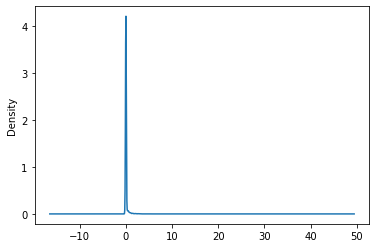

In [78]:
# 4.5 price (0 rows with any missing)
%run -i '2_summary_stats_visualization_new.py'
new_class_df = impute_missing(merged_df=DF8,
                              all_panels=all_panels,
                              missing_ratio = 0.2)
sample_df = new_class_df.peek_at_sample_var_panels(var='price', sample=30)
appid_df, appid_l = new_class_df.check_apps_with_consecutive_missing_panels(var='price',
                                                    number_consec_panels_missing=1)
dfq, ax = new_class_df.peek_at_outliers(var='price', method='std',
                                      quantiles=[0.9,0.95,0.99,0.995], q_inter='midpoint')
s_o, index_o = new_class_df.define_outlier_appids(var='price', method='std',
                                                   cutoff_q=0.995, q_inter='midpoint')
# for the price change drastically within the panels app outliers, I decide to keep them here
# for a while and see the regression results to see if I need to readjust
# searched a few of them in s_o, they seem to be valid apps

In [79]:
# the dummy_nan column == 1 means the row is nan.
# need to re-run 1_scraping_cleaning_merge.py, this time decide to turn pandas get_dummmies dummy_na from True to False
# so that the nan columns will be removed
# 4.6 free
%run -i '2_summary_stats_visualization_new.py'
new_class_df = impute_missing(merged_df=DF8,
                              all_panels=all_panels,
                              missing_ratio = 0.2)
sample_df = new_class_df.peek_at_sample_var_panels(var='free', sample=30)
print(sample_df.columns)
appid_df, appid_l = new_class_df.check_apps_with_consecutive_missing_panels(var='free',
                                                    number_consec_panels_missing=1)

Index(['free_True_201907', 'free_True_201908', 'free_True_201909',
       'free_True_201912', 'free_True_202001', 'free_True_202003',
       'free_True_202004', 'free_True_202009', 'free_True_202010',
       'free_True_202011', 'free_True_202012', 'free_True_202101',
       'free_True_202102'],
      dtype='object')
number of apps with at least 1 consecutive missing panels for free are 0
out of 9706 apps.
